In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
os.chdir(os.environ.get("WORK_DIR"))
from pprint import pprint

In [2]:
from biochatter.llm_connect import GptConversation
from biochatter.api_agent import APIAgent, ScanpyQueryBuilder, ScanpyFetcher, ScanpyInterpreter

import yaml
import os
import scanpy
from scanpy.datasets import krumsiek11

scanpy.settings.datasetdir = os.environ.get("DATA", "data")

system_prompt = """
You are a professional bioinformatician. You have access to the data object named `data`.
Please only use the provided tools. Do not use any tools that are not provided.
"""
query_builder_conv = GptConversation(model_name="gpt-3.5-turbo", prompts={
    "primary_model_prompts": system_prompt
})
interpreter_conv = GptConversation(model_name="gpt-3.5-turbo", prompts={
    "primary_model_prompts": system_prompt
})

scanpy_agent = APIAgent(
    query_builder=ScanpyQueryBuilder(
        conversation=query_builder_conv,
    ),
    fetcher=ScanpyFetcher(),
    interpreter=ScanpyInterpreter( # Jiahang: explain codes, args, etc. see biomania.
        conversation=interpreter_conv,
    )
)

with open('experiment/scanpy/cases.yaml', 'r') as f:
    cases = yaml.safe_load(f)


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
len(cases)

19

In [4]:
for i, case in enumerate(cases):
    print(f"{i}: {case}")

0: Plot umap embedding of cells.
1: Plot umap embedding of cells, which are colored by leiden clustering.
2: Plot heatmap of gene expressions of genes Gata2, Gata1 and Fog1, where cells are clustered by louvain algorithm.
3: Plot dotplot with dendrogram of gene expressions of genes Gata2, Gata1 and Fog1, where cells are clustered by louvain algorithm.
4: Plot violinplot of gene expressions of genes Gata2, Gata1 and Fog1, where cells are clustered by louvain algorithm.
5: visualize dendrogram of clusters defined by louvain algorithm on cells.
6: visualize diffusion map embedding of cells which are clustered by leiden algorithm.
7: visualize dispersions versus mean expressions of genes in scatter plot.
8: visualize PCA embedding of cells.
9: visualize PCA embedding of cells which are clustered by louvain algorithm.
10: visualize umap embedding density of cells.
11: visualize ranking of marker genes of clusters calculated by leiden algorithm.
12: visualize fraction of counts assigned to e

In [5]:
def run(i: int, question: str):
    print(f"===== QUESTION {i}: {question} =====")
    data = krumsiek11()
    try:
        result = scanpy_agent.execute(question, data=data)
    except Exception as e:
        print(f"error {i}")
        print(e)
        return e
    else:
        print()
        return None

===== QUESTION 0: Plot umap embedding of cells. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


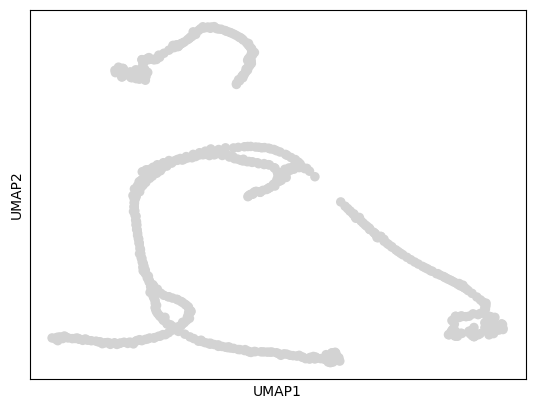

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=50, knn=True)
sc.tl.umap(adata=data, min_dist=0.5, spread=1.0, n_components=2)
sc.pl.umap(adata=data, color=None, mask_obs=None, gene_symbols=None, use_raw=None, sort_order=True, edges=False, edges_width=0.1, edges_color='grey', neighbors_key=None, arrows=False, arrows_kwds=None, groups=None, components=None, dimensions=None, layer=None, projection='2d', scale_factor=None, color_map=None, cmap=None, palette=None, na_color='lightgray', na_in_legend=True, size=None, frameon=None, legend_fontsize=None, legend_fontweight='bold', legend_loc='right margin', legend_fontoutline=None, colorbar_loc='right', vmax=None, vmin=None, vcenter=None, norm=None, add_outline=False, outline_width=(0.3, 0.05), outline_color=('black', 'white'), ncols=4, hspace=0.25, wspace=None, show=True, save=None, ax=None, return_fig=None, marker='.')


===== QUESTION 1: Plot umap embedding of cells, which are colored by leiden clustering. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/jiahang/Documents/biochatter/biochatter/api_agent/base/_python_interpreter.py:743: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  return func(*args, **kwargs)


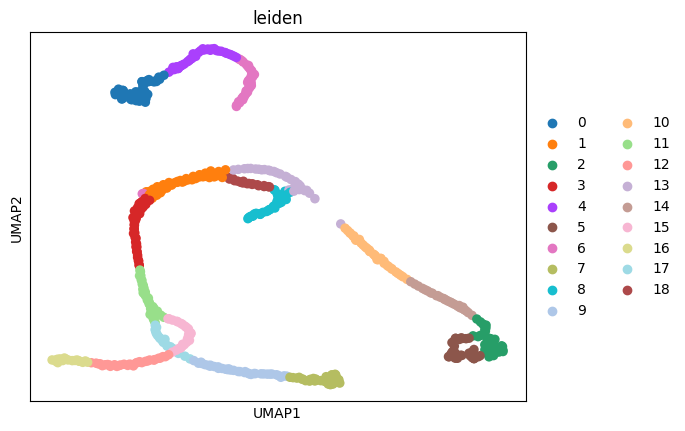

/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.umap(adata=data, min_dist=0.5, spread=1.0, n_components=2)
sc.tl.leiden(adata=data, resolution=1.0, random_state=0, use_weights=True)
sc.pl.umap(adata=data, color='leiden', mask_obs=None, gene_symbols=None, use_raw=None, sort_order=True, edges=False, edges_width=0.1, edges_color='grey', neighbors_key=None, arrows=False, arrows_kwds=None, groups=None, components=None, dimensions=None, layer=None, projection='2d', scale_factor=None, color_map=None, cmap=None, palette=None, na_color='lightgray', na_in_legend=True, size=None, frameon=None, legend_fontsize=None, legend_fontweight='bold', legend_loc='right margin', legend_fontoutline=None, colorbar_loc='right', vmax=None, vmin=None, vcenter=None, norm=None, add_outline=False, outline_width=(0.3, 0.05), outline_color=('black', 'white'), ncols=4, hspace=0.25, wspace=None, show=None, save=None, ax=None, return_fig=None, marker='.')


===== QUESTION 2: Plot heatmap of

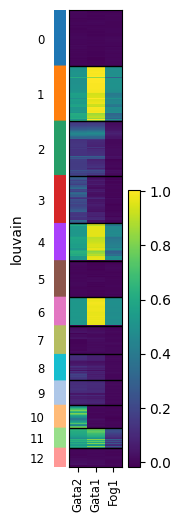

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.louvain(adata=data, resolution=None, random_state=0)
sc.pl.heatmap(adata=data, var_names=['Gata2', 'Gata1', 'Fog1'], groupby='louvain')


===== QUESTION 3: Plot dotplot with dendrogram of gene expressions of genes Gata2, Gata1 and Fog1, where cells are clustered by louvain algorithm. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


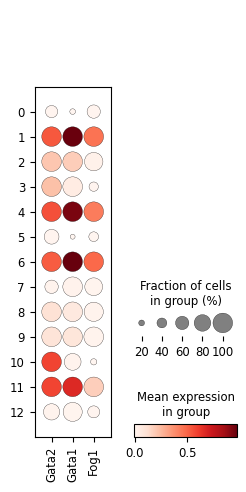

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.louvain(adata=data, resolution=None, random_state=0)
sc.pl.dotplot(adata=data, var_names=['Gata2', 'Gata1', 'Fog1'], groupby='louvain')


===== QUESTION 4: Plot violinplot of gene expressions of genes Gata2, Gata1 and Fog1, where cells are clustered by louvain algorithm. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


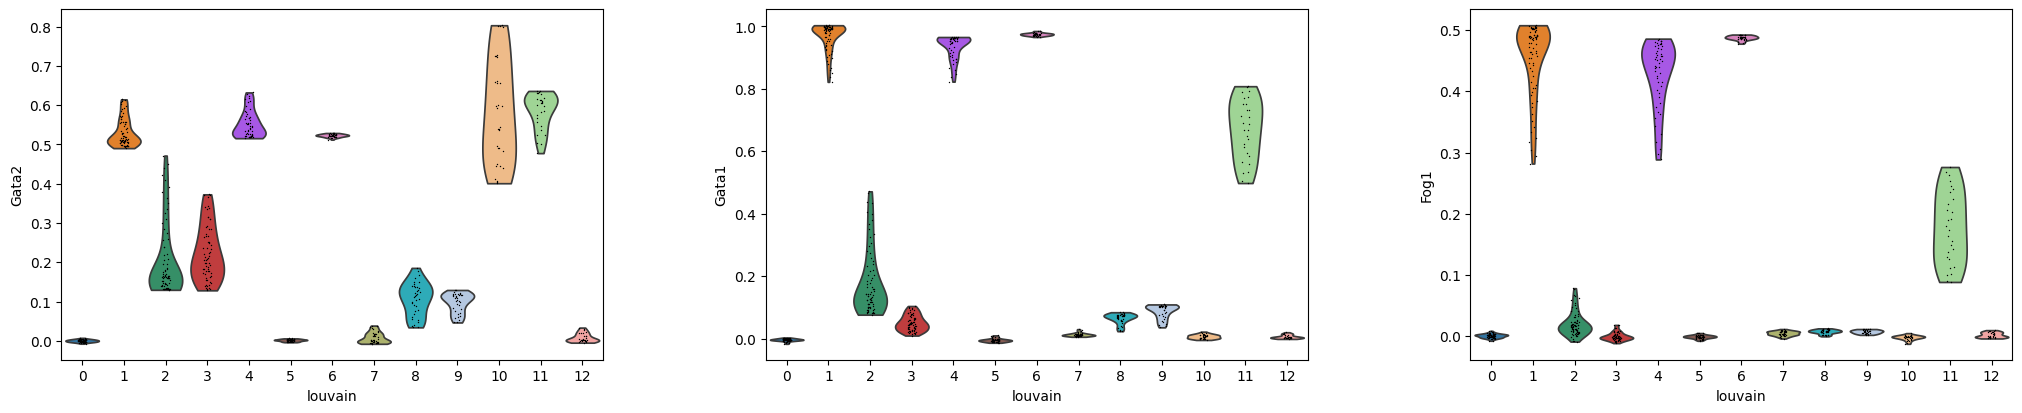

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.louvain(adata=data, resolution=None, random_state=0)
sc.pl.violin(adata=data, keys=['Gata2', 'Gata1', 'Fog1'], groupby='louvain')


===== QUESTION 5: visualize dendrogram of clusters defined by louvain algorithm on cells. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


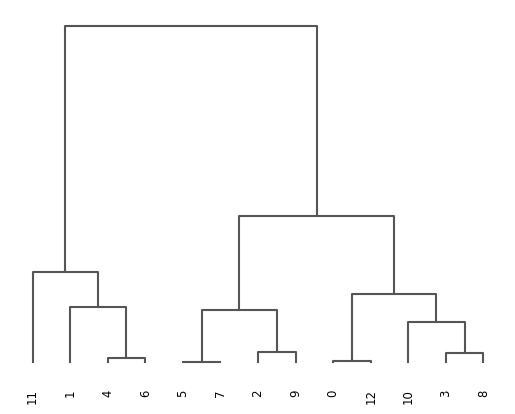

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.louvain(adata=data, resolution=None, random_state=0)
sc.pl.dendrogram(adata=data, groupby='louvain')


===== QUESTION 6: visualize diffusion map embedding of cells which are clustered by leiden algorithm. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/pydantic/json_schema.py:2279: PydanticJsonSchemaWarning: Default value (FieldInfo(annotation=NoneType, required=False, default='data', description='Annotated data matrix'),) is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)


error 6
Code execution failed at line 'sc.tl.diffmap(adata=data, n_comps=2)' due to: ValueError: Provide any value greater than 2 for `n_comps`. 

===== QUESTION 7: visualize dispersions versus mean expressions of genes in scatter plot. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


error 7
'highly_variable'

===== QUESTION 8: visualize PCA embedding of cells. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


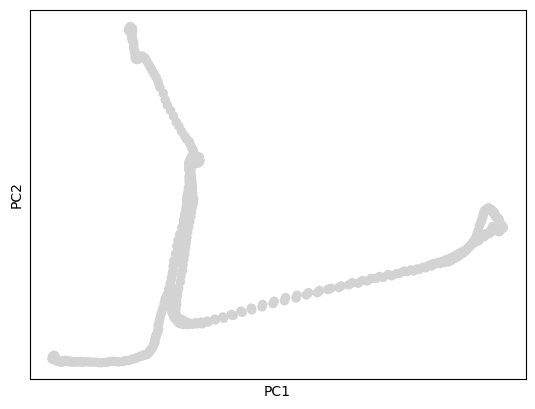

ROOT()
sc.pp.pca(data=data, n_comps=2, layer=None, zero_center=True, svd_solver=None, random_state=0, return_info=True, mask_var=None, use_highly_variable=None, dtype='float32', chunked=False, chunk_size=None)
sc.pl.pca(adata=data, color=None, components=['1,2'], projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, frameon=None, size=None, show=True, save=None, ax=None, return_fig=False, marker='.', annotate_var_explained=False)


===== QUESTION 9: visualize PCA embedding of cells which are clustered by louvain algorithm. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


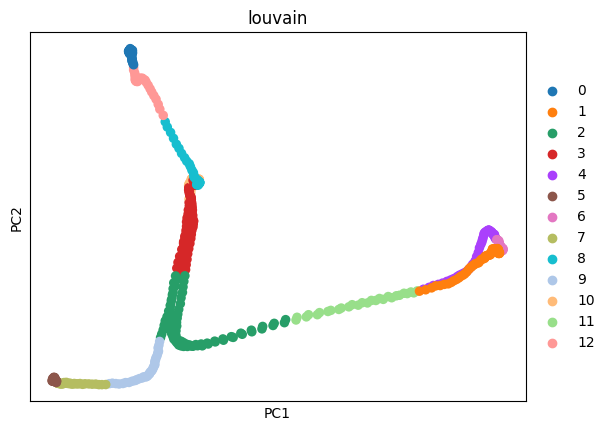

ROOT()
sc.pp.pca(data=data, n_comps=2, layer=None, zero_center=True, svd_solver=None, random_state=0, return_info=True, mask_var=None, use_highly_variable=None, dtype='float32', chunked=False, chunk_size=None)
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=50, knn=True)
sc.tl.louvain(adata=data, resolution=None, random_state=0)
sc.pl.pca(adata=data, color='louvain', components='1,2', projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, frameon=None, size=None, show=None, save=None, ax=None, return_fig=False, marker='.', annotate_var_explained=False)


===== QUESTION 10: visualize umap embedding density of cells. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


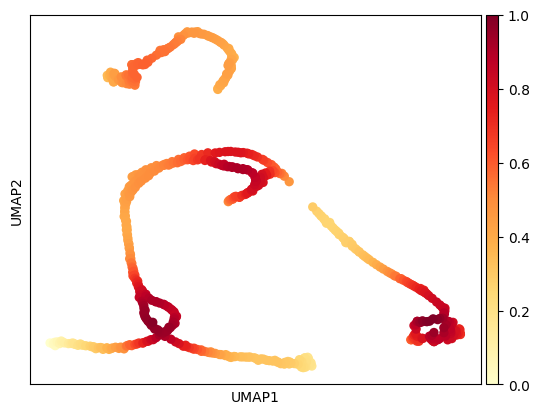

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=50, knn=True)
sc.tl.umap(adata=data, min_dist=0.5, spread=1.0, n_components=2)
sc.tl.embedding_density(adata=data, basis='umap', groupby=None, components=None)
sc.pl.embedding_density(adata=data, basis='umap', key=None, groupby=None)


===== QUESTION 11: visualize ranking of marker genes of clusters calculated by leiden algorithm. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "l

error 11
Code execution failed at line 'sc.pl.rank_genes_groups_dotplot(adata=data, groups='leiden', n_genes=None, groupby=None)' due to: KeyError: "None of [Index(['l'], dtype='object')] are in the [columns]"

===== QUESTION 12: visualize fraction of counts assigned to each gene. =====


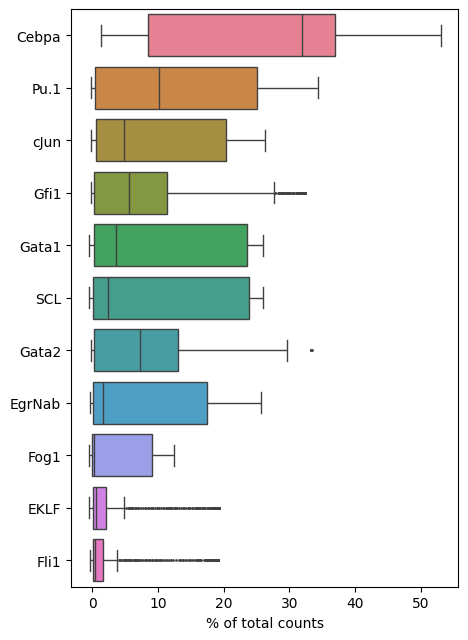

ROOT()
sc.pl.highest_expr_genes(adata=data, n_top=30, layer=None, gene_symbols=None)


===== QUESTION 13: visualize tsne embedding of cells' gene counts data where cells are colored by louvain clustering. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


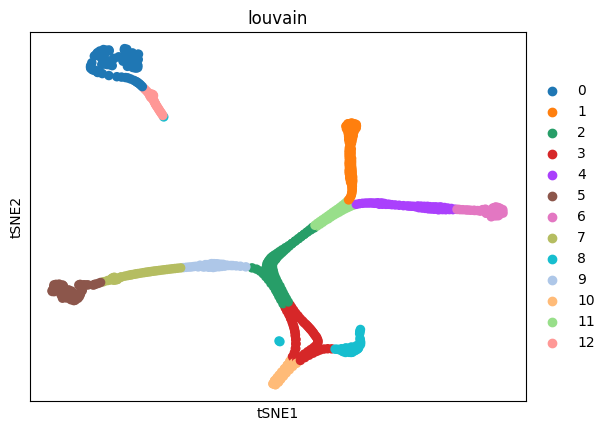

ROOT()
sc.tl.tsne(adata=data, n_pcs=None)
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.louvain(adata=data, resolution=None, random_state=0)
sc.pl.tsne(adata=data, color='louvain', gene_symbols=None, use_raw=None, sort_order=True, edges=False, edges_width=0.1, edges_color='grey', neighbors_key=None, arrows=False, arrows_kwds=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight='bold', legend_fontoutline=None, size=None, color_map=None, palette=None, na_color='lightgray', na_in_legend=True, frameon=None, vmin=None, vmax=None, vcenter=None, norm=None, add_outline=False, outline_width=(0.3, 0.05), outline_color=('black', 'white'), ncols=4, hspace=0.25, wspace=None, return_fig=None, show=None, save=None, ax=None)


===== QUESTION 14: visualize tsne embedding density of cells. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


error 14
'umap_density'

===== QUESTION 15: visualize genes expression values of genes Gata2, Gata1 and Fog1 through tracksplot, where cells are clustered by louvain algorithm. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


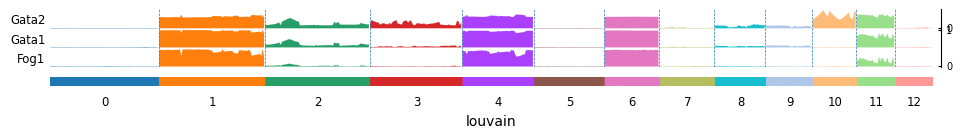

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.louvain(adata=data, resolution=None, random_state=0)
sc.pl.tracksplot(adata=data, var_names=['Gata2', 'Gata1', 'Fog1'], groupby='louvain', use_raw=None, log=None)


===== QUESTION 16: visualize hierarchically-clustered heatmap of cells. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


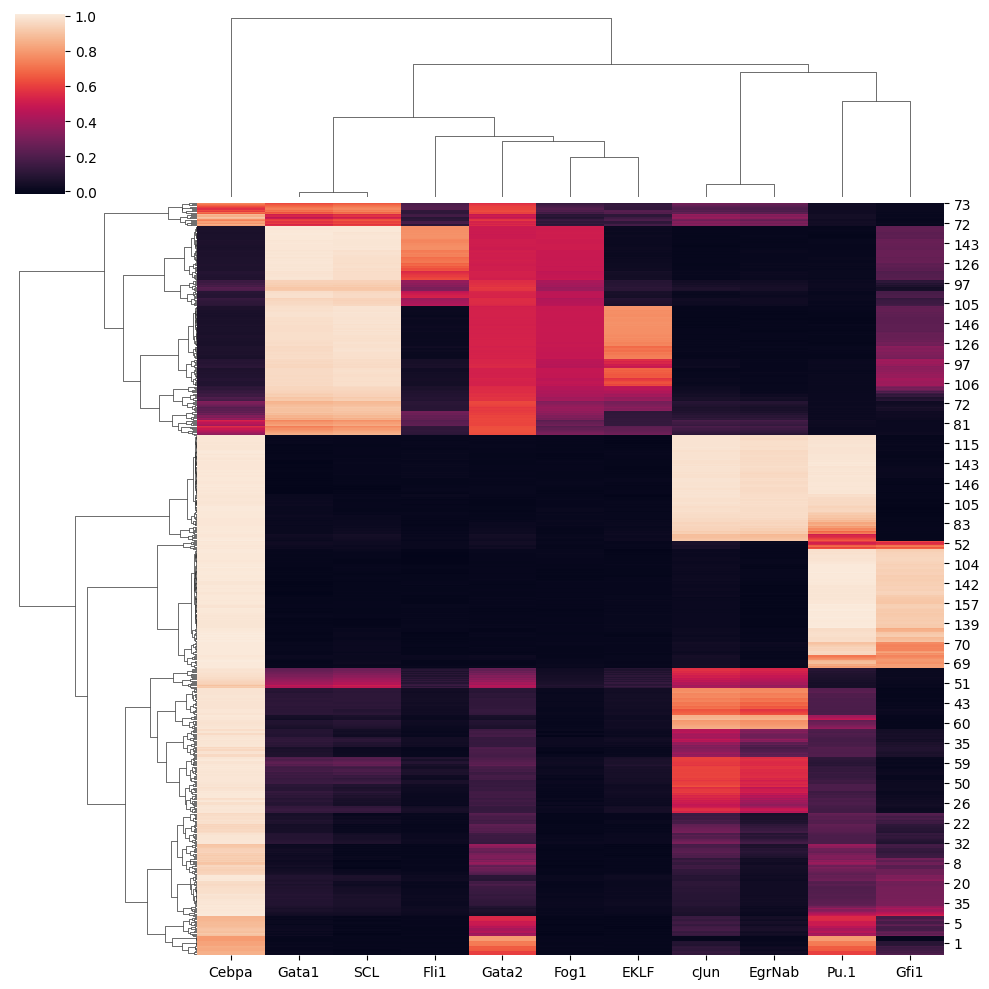

ROOT()
sc.pl.clustermap(adata=data, obs_keys=None, use_raw=None)


===== QUESTION 17: visualize hierarchically-clustered heatmap of cells, where cells are clustered by leiden algorithm. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


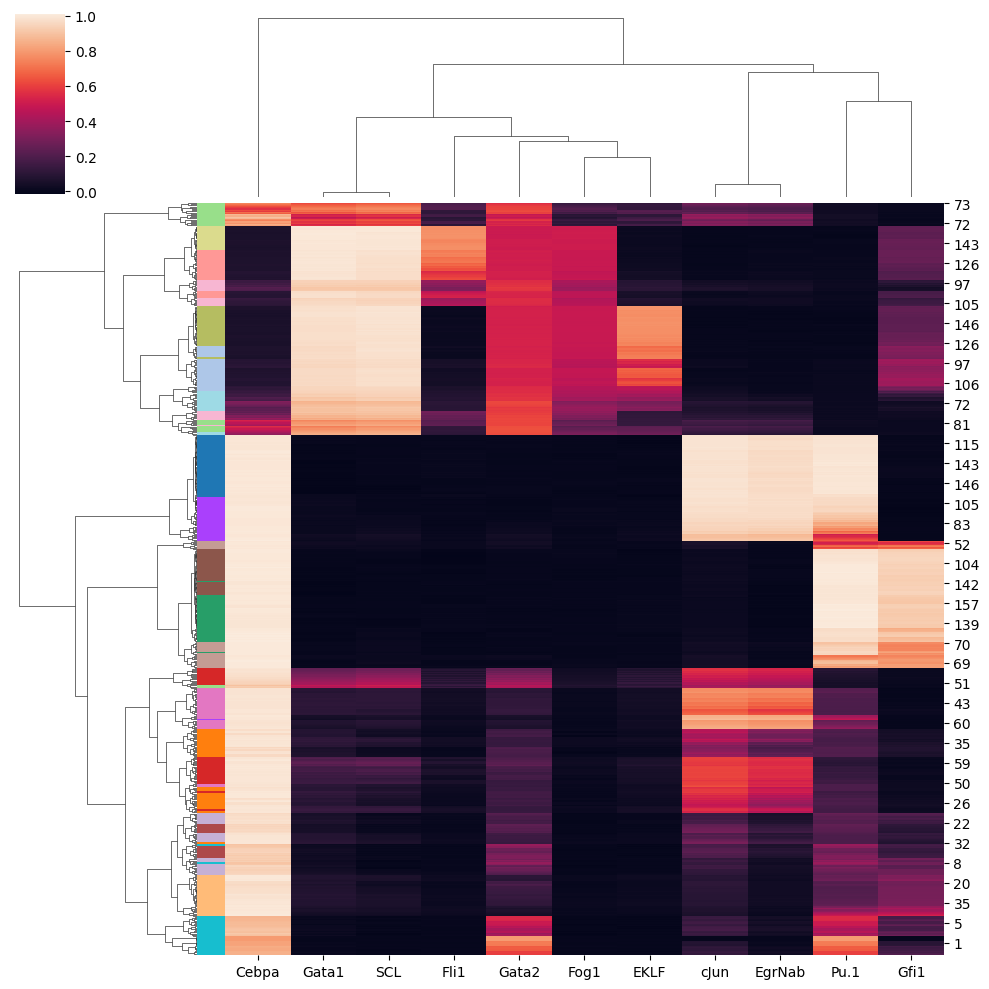

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.leiden(adata=data, resolution=1.0, random_state=0, use_weights=True)
sc.pl.clustermap(adata=data, obs_keys='leiden', use_raw=None)


===== QUESTION 18: visualize stacked violin plot of gene expressions of genes Gata2, Gata1 and Fog1, where cells are clustered by leiden algorithm. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


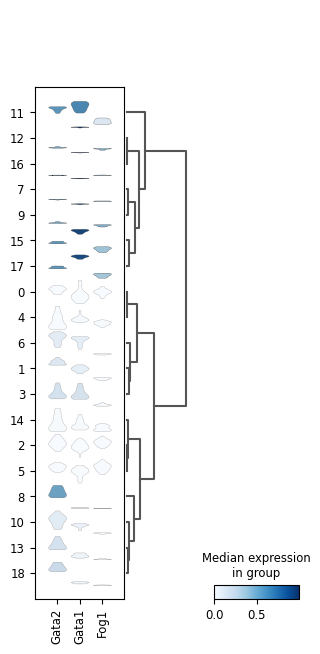

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.leiden(adata=data, resolution=1.0, random_state=0, use_weights=True)
sc.pl.stacked_violin(adata=data, var_names=['Gata2', 'Gata1', 'Fog1'], groupby='leiden', use_raw=None, log=False, dendrogram=True)




In [6]:
error_cases = {}
for i, question in enumerate(cases):
    e = run(i, question)
    if e:
        error_cases[question] = e
    print()

# Explanations

### visualize diffusion map embedding of cells which are clustered by leiden algorithm.
* n_comps default is 15, but always predicted to be 2. maybe temperature = 0 too low? try increase temperature and more trials with n > 1

### visualize dispersions versus mean expressions of genes in scatter plot.
* sc.pp.highvariablegenes always set inplace=False, of which default is True. It shouldn't be changed since users do not specify. inplace=False result in the returned data not being stored in data object.

### visualize ranking of marker genes of clusters calculated by leiden algorithm.
* groups and groupby arguments are confusing for LLM.

### visualize tsne embedding density of cells
* tl.embedding_density and pl.embedding_density has variable products and dependency names, which is fixed to umap ones in our cases. This is a bad practice.

# test

In [9]:
import scanpy as sc
data = krumsiek11()

/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [40]:
import scanpy as sc
data = krumsiek11()
sc.pp.neighbors(data)
sc.tl.louvain(data)
sc.tl.paga(data, groups='louvain')
# sc.pl.paga(data)
# sc.tl.umap(data, init_pos='paga')
# sc.pl.umap(data, color='louvain')

/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [38]:
data.obs.pop('louvain')
data.obs

,cell_type
0,progenitor
1,progenitor
2,progenitor
3,progenitor
4,progenitor
...,...
155,Neu
156,Neu
157,Neu
158,Neu


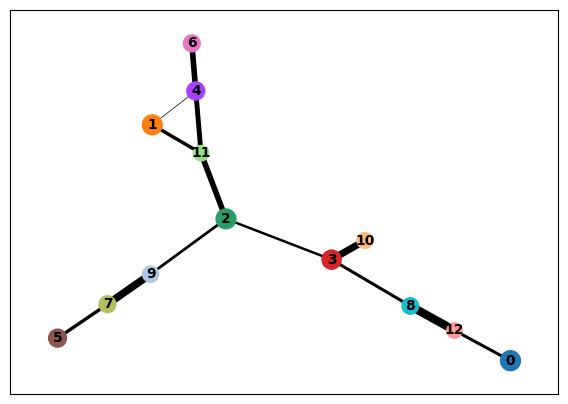

In [42]:
sc.pl.paga(data, color='louvain')